# Time Series Analysis of SuperWASP
This time series analysis of SuperWASP data was an attempt at measuring the rotation period of the M-type star GJ 3942.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.timeseries import LombScargle
import lightkurve as lk

## Rotation Period
Our rotation period used is that of a best-fit frequency, while the recorded rotation period is 16.3 days. This can be found in the reference paper. Within the TESS time series analysis, a best-fit frequency of 15.645898033750315 was found and used. The fonts for plots are also stated here.

Reference Paper: [HADES RV Programme with HARPS-N at TNG VI](https://arxiv.org/pdf/1709.06851.pdf)

In [2]:
rp = 15.7
title_font = 18
label_font = 14
tick_font = 12

## SuperWASP Dataset



In [3]:
SuperWASP_data = "/Users/andrewandmatthewfonseca/Downloads/plot.tbl"
y = pd.read_table(SuperWASP_data, comment='#', delim_whitespace=True)
colnames = ['HJD', 'TAMMAG2', 'T']
data = pd.read_csv(SuperWASP_data, comment="#", header=0, names=colnames, delim_whitespace=True, skiprows=3)
# Add titles and labels to plots of SuperWASP data

          \fixlen               =             T
0        |set|HJD        |TAMMAG2             |
1     |int|double         |double             |
2               0  2453837.533565  1.015264e+01
3               0  2453837.544664  1.015876e+01
4               0  2453837.549965  1.017314e+01
...           ...             ...           ...
7369            0  2454586.729572  1.021606e+01
7370            0  2454586.731273  1.019219e+01
7371            0  2454586.731713  1.020349e+01
7372            0  2454586.734641  1.022221e+01
7373            0  2454586.735081  1.021718e+01

[7374 rows x 3 columns]


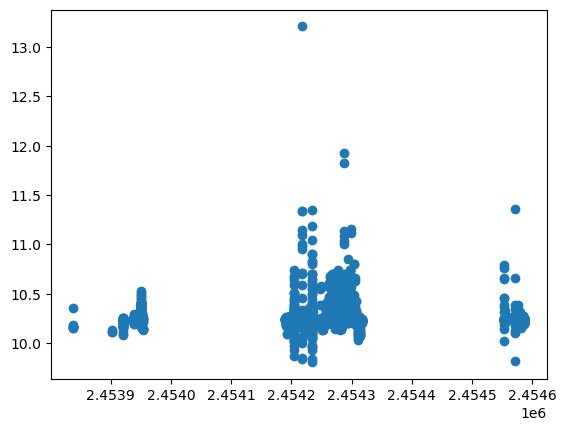

In [4]:
# Scatter Plot of SuperWASP data
set, jd, tammag2 = np.loadtxt(SuperWASP_data, skiprows=3, unpack=True)
plt.scatter(jd, tammag2)
print(y)

(array([4.491e+03, 2.141e+03, 5.800e+02, 3.900e+01, 1.000e+00, 9.000e+01,
        2.000e+01, 4.000e+00, 2.000e+00, 3.000e+00]),
 array([-3.38090677, -2.80531975, -2.22973273, -1.65414571, -1.07855869,
        -0.50297168,  0.07261534,  0.64820236,  1.22378938,  1.7993764 ,
         2.37496342]),
 <BarContainer object of 10 artists>)

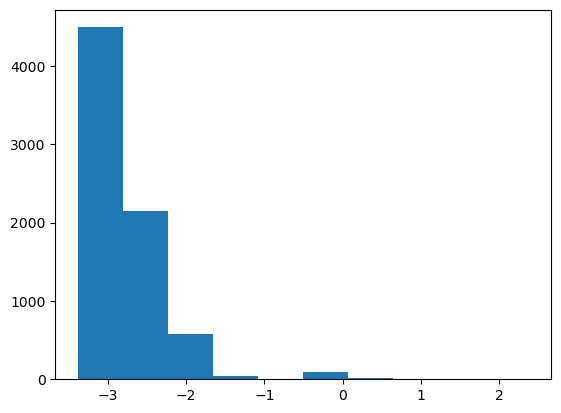

In [5]:
# Histogram of SuperWASP data
dt = np.diff(jd)
plt.hist(np.log10(dt))

(0.0, 0.5)

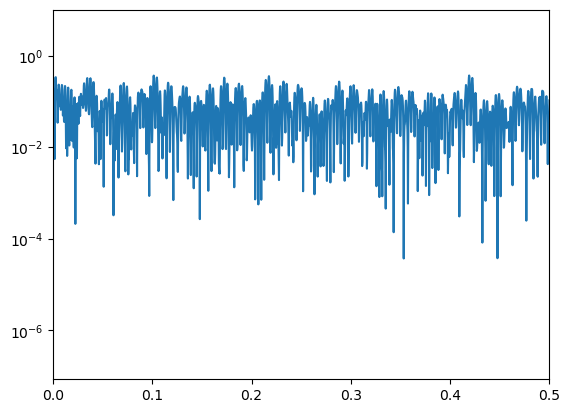

In [6]:
# Periodogram of SuperWASP data
frequency_sw, power_sw = LombScargle(jd - jd[0], tammag2, normalization="psd").autopower()
plt.semilogy(frequency_sw, power_sw)
plt.xlim(0, 0.5)

In [7]:
max_index_sw = np.argmax(power_sw)
print(frequency_sw[max_index_sw])
rotation_sw = 1/frequency_sw[max_index_sw]
rp/rotation_sw 
#This leads the rotation being 1, which then gives back the same number, 16.21875

1.002800960696906


15.743975082941423

<Axes: xlabel='Time [JD]', ylabel='Flux'>

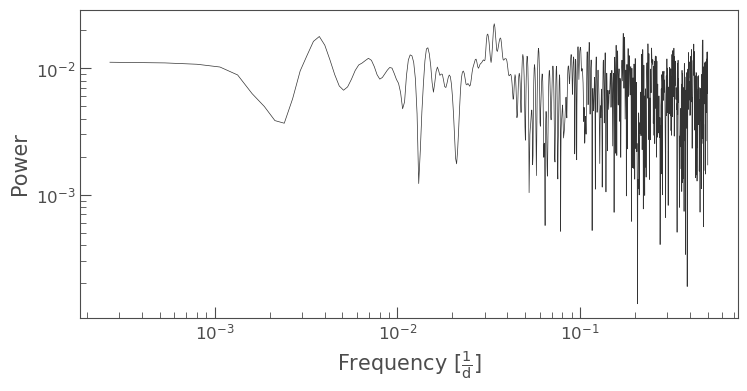

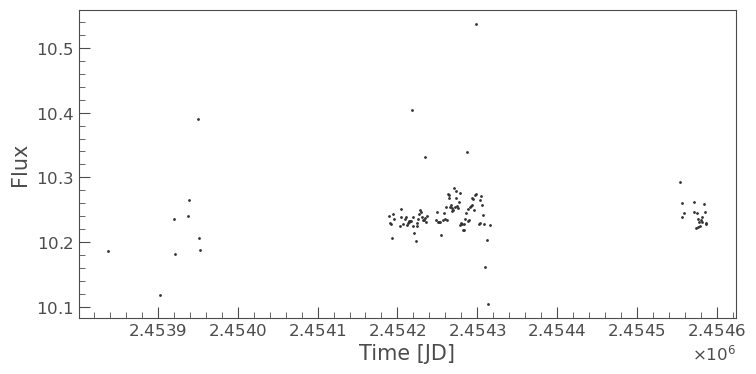

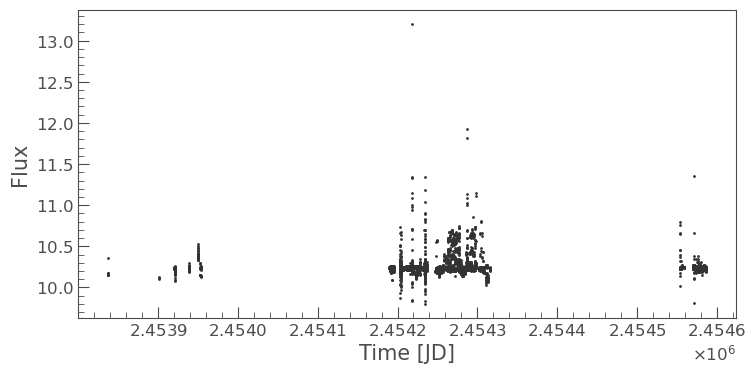

In [8]:
# Original binned lightcurve
my_lightcurve = lk.LightCurve(time=jd, flux=tammag2)
my_lightcurve_bin = my_lightcurve.bin(time_bin_size=1) # bin size of 1 day
lightcurve_periodogram = my_lightcurve_bin.to_periodogram(method='lombscargle')
lightcurve_periodogram.plot(scale='log')
my_lightcurve_bin.scatter()
my_lightcurve.scatter()
#print(my_lightcurve_bin)
#print(my_lightcurve.flux)
#print(tammag2)
# The columns of the binned lightcurve are the time, flux, flux_err, time_bin_start, and time bin_size.
# The binned lightcurve is 750 rows long.

## Spectral Window of SuperWASP data (no lightcurve vs. lightcurve)

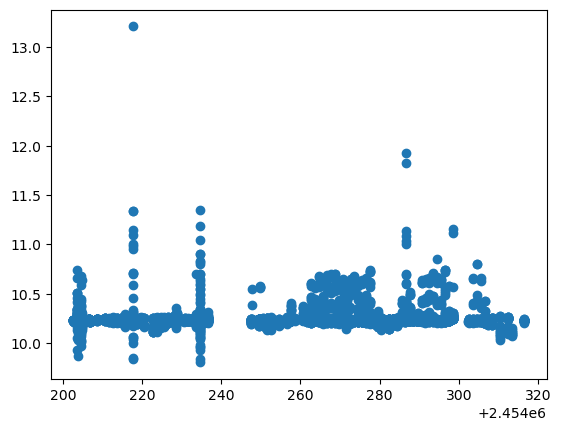

In [9]:
# Cutting data to have only main data
main_data = []
for j in range(len(jd)):
    if (jd[j] > 2.4542e6) and (jd[j] < 2.4544e6):
        main_data.append(j)
main_jd = jd[main_data]
main_tammag2 = tammag2[main_data]
plt.scatter(main_jd, main_tammag2)

(0.01, 10000.0)

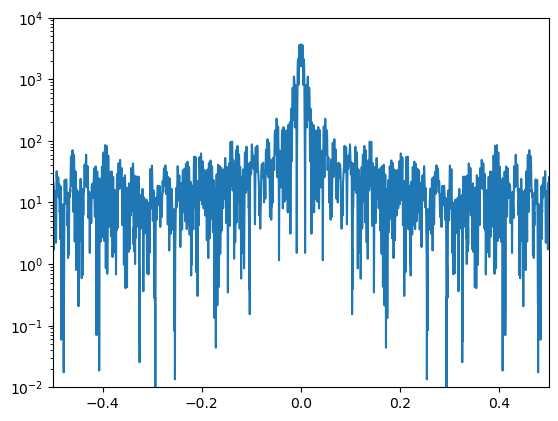

In [10]:
# Lomb-Scargle (spectral window) (all data) [1]
plt.figure()
freq, specwin = LombScargle(jd - jd[0], np.ones(len(jd)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.xlim(-0.5, 0.5)
plt.ylim(1e-2, 1e4)

(0.01, 10000.0)

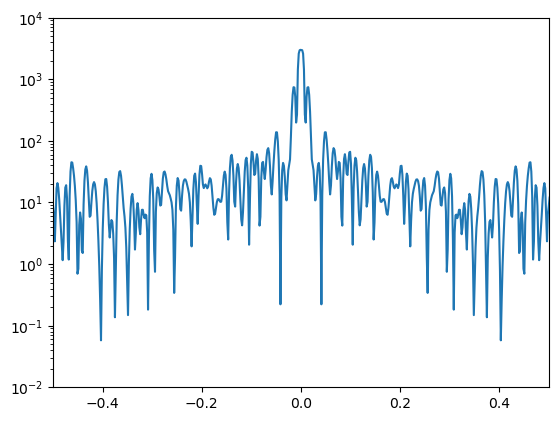

In [11]:
# Lomb-Scargle (cut data)
plt.figure()
freq, specwin = LombScargle(main_jd - main_jd[0], np.ones(len(main_jd)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.xlim(-0.5, 0.5)
plt.ylim(1e-2, 1e4)

(0.0, 0.5)

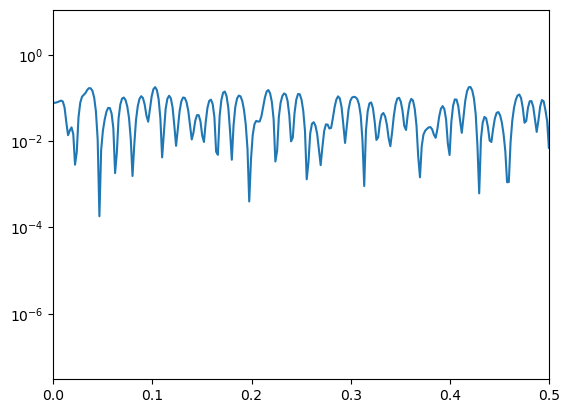

In [12]:
# Periodogram of SuperWASP data
plt.figure()
cut_frequency, cut_power = LombScargle(main_jd - main_jd[0], main_tammag2, normalization="psd").autopower()
plt.semilogy(cut_frequency, cut_power)
plt.xlim(0, 0.5)

(0.01, 10000.0)

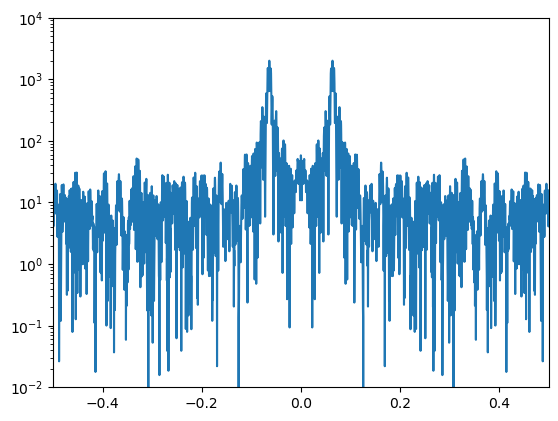

In [13]:
# Pesudo-window (uncut, unbinned) [2]
plt.figure()
freq, specwin = LombScargle(jd - jd[0], np.sin(2*np.pi*(jd-jd[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.xlim(-0.5, 0.5)
plt.ylim(1e-2, 1e4)

     time             flux        ... time_bin_start time_bin_size
                                  ...                      d      
-------------- ------------------ ... -------------- -------------
2453838.033565        10.18547625 ... 2453837.533565           1.0
2453902.033565 10.117193333333333 ... 2453901.533565           1.0
2453920.033565 10.235812500000002 ... 2453919.533565           1.0
2453921.033565 10.181635652173911 ... 2453920.533565           1.0
2453938.033565 10.240692333333335 ... 2453937.533565           1.0
2453939.033565         10.2654525 ... 2453938.533565           1.0
           ...                ... ...            ...           ...
2454580.033565 10.233751630434782 ... 2454579.533565           1.0
2454581.033565 10.238334788732395 ... 2454580.533565           1.0
2454582.033565        10.23080625 ... 2454581.533565           1.0
2454584.033565 10.258438333333332 ... 2454583.533565           1.0
2454585.033565 10.245749215686274 ... 2454584.533565          

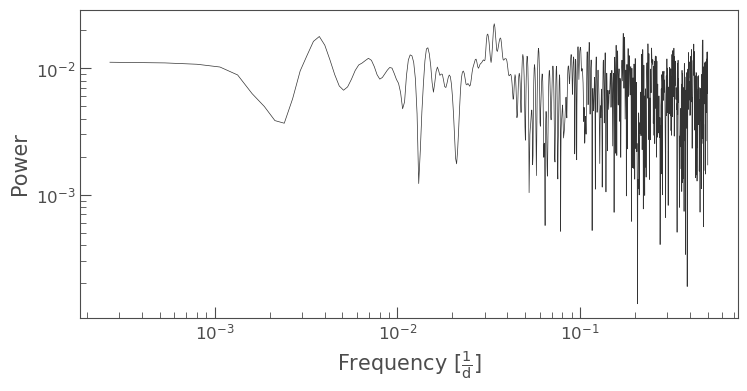

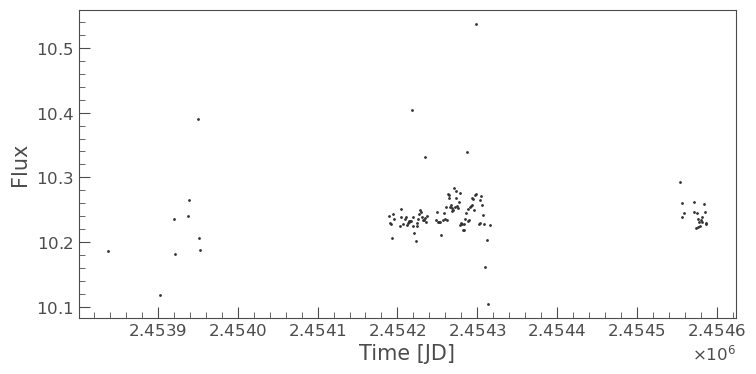

In [14]:
# Removing NaN data from binned lightcurve (rename to remove confusion)
my_lightcurve_bin_new = my_lightcurve_bin.remove_nans()
lightcurve_periodogram_new = my_lightcurve_bin_new.to_periodogram(method='lombscargle')
lightcurve_periodogram_new.plot(scale='log')
my_lightcurve_bin_new.scatter()
print(my_lightcurve_bin_new) #To untruncate, using a for loop to iterate through the list
# The original binned lightcurve didnt plot the NaN's anyways; it would be the same plot

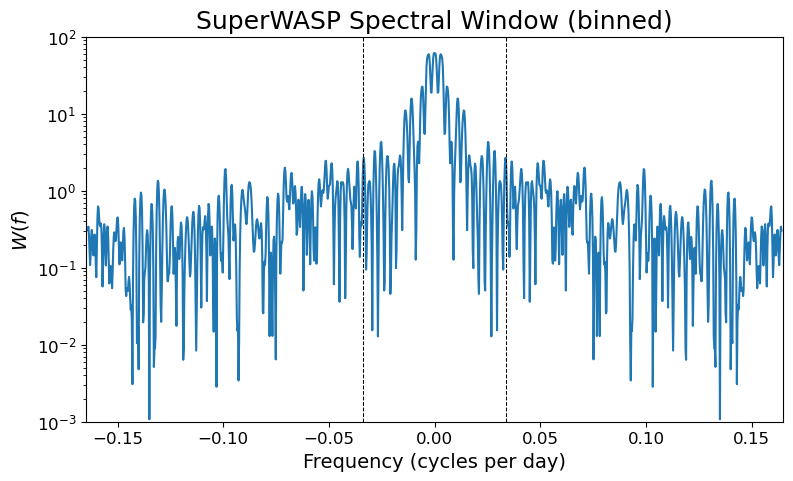

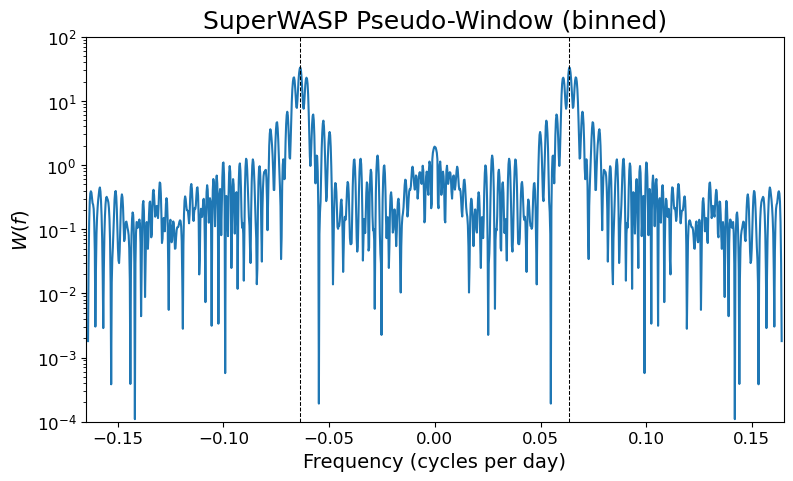

In [15]:
# Pseudo-Window for binned Lightcurve
bin_time = my_lightcurve_bin_new.time.value
negative_xlim = -0.165
positive_xlim = 0.165

plt.figure(figsize=(9, 5))
plt.title("SuperWASP Spectral Window (binned)", fontsize=title_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
freq, specwin = LombScargle(bin_time - bin_time[0], np.ones(len(bin_time)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.xlim(negative_xlim, positive_xlim)
plt.ylim(1e-3, 1e2)
#make this line a dotted-line for harmonic
plt.axvline(1/29.5, linestyle='--', linewidth=0.75, color='black')
plt.axvline(-(1/29.5), linestyle='--', linewidth=0.75, color='black')

plt.figure(figsize=(9, 5))
plt.title("SuperWASP Pseudo-Window (binned)", fontsize=title_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
freq, specwin = LombScargle(bin_time - bin_time[0], np.sin(2*np.pi*(bin_time-bin_time[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.xlim(negative_xlim, positive_xlim)
plt.ylim(1e-4, 1e2)
#make these lines a dotted-line for the harmonics
plt.axvline(1/rp, linestyle='--', linewidth=0.75, color='black') # positive rotation period vline
plt.axvline(-(1/rp), linestyle='--', linewidth=0.75, color='black') # negative rotaiton period vline

In [16]:
# Maximum frequency and period
frequency_peak = lightcurve_periodogram.frequency_at_max_power
period_associated = 1 / frequency_peak
print("Frequency of Maximum Power (Peak):", frequency_peak)
print("Period associated with the peak:", period_associated)
# test by getting binned data points from lighcurve

Frequency of Maximum Power (Peak): 0.033911882510013355 1 / d
Period associated with the peak: 29.48818897637795 d
